<a href="https://colab.research.google.com/github/gabrielBragaaa/ESper.php/blob/main/Mudan%C3%A7as_Clim%C3%A1ticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TENDÊNCIAS E INDICADORES DAS MUDANÇAS CLIMÁTICAS NO MUNDO (1961-2022)**
 Este conjunto de dados tem indicadores de mudanças climáticas para diferentes países com seus códigos associados (ISO2 E ISO3). A medição foi atualizada anualmente até 2022 a partir de 1961.

LINK:https://www.kaggle.com/datasets/tarunrm09/climate-change-indicators/data

# **Sobre o nosso projeto:**

**Objetivo:** Compreender as mudanças climáticas globais ao longo do tempo, identificar tendências e prever futuras alterações.

**Decisão:** Identificarmos os países mais afetados e prever mudanças futuras na temperatura média global.

A nossa análise tem como foco mostrar à crise climática global e à necessidade de valorizarmos  dados científicos.

**Fonte:** Arquivo CSV com indicadores climáticos e GeoJSON para visualizações geográficas.

**Características principais:**


1.  Anos: 1961 a 2022.
2.  Países: Inclusão global.
3. **Métrica principal:** Mudança de temperatura ao longo do tempo.

# **Fazendo as importações necessárias para se trabalhar no conjunto de dados e carregando os dados**

In [2]:
import pandas as pd #Biblioteca utilizada para manipulação de dados em formato de tabelas (DataFrames).
import plotly.express as px #Biblioteca para visualizações interativas.
import warnings
from sklearn.model_selection import train_test_split #Usamos a biblioteca scikit-learn, para dividir um conjunto de dados em dois subconjuntos: um para treino e outro para teste.
from sklearn.linear_model import LinearRegression # Usada para criar um modelo de regressão linear para prever uma variável contínua a partir de outras variáveis.
from sklearn.metrics import mean_squared_error, r2_score #Métricas de avaliação do modelo.
import matplotlib.pyplot as plt #é uma biblioteca para criação de gráficos estáticos, usamos para gerar plots em gráficos 2D.
import seaborn as sns # Biblioteca para visualizações estatísticas

warnings.filterwarnings("ignore")

# Carregar os dados
df = pd.read_csv(r"/content/climate_change_indicators.csv")



# Transformar os dados
# Preparação dos dados
year_list = [f"F{i}" for i in range(1963, 2023)] #Criação de lista
df_melt = pd.melt(df, id_vars=["Country"], value_vars=year_list)
# Renomeamos as colunas para nomes mais intuitivos
df_melt.rename(columns={"variable": "Year", "value": "Tempurate_Change"}, inplace=True)
df_melt['Year'] = df_melt['Year'].str.replace(r'F', '', regex=True).astype(int)

# Convertemos a coluna de mudanças de temperatura para valores numéricos.
# ALteramos Valores inválidos ou inconsistentes e serão tratados como NaN.
df_melt['Tempurate_Change'] = pd.to_numeric(df_melt['Tempurate_Change'], errors='coerce')

# Removemos linhas com valores ausentes para garantir a integridade das análises.
df_melt.dropna(inplace=True)



# **Verificar as primeiras linhas do conjunto**

# **Nesse conjunto temos os dados e o nomes de suas respectivas colunas:**
**ObjectId** que corresponde ao indificador unico de cada coluna.

**Country** corresponde ao nome dos países relacionado a cada entrada de dados.

**ISO2** É uma norma internacional que corresponde ao nome dos paises em siglas como o Brasil(BR).

**ISO3**  Outra norma internacional que tambem corresponde ao nome dos paises em siglas porem este se apresenta em três ex: Brasil(BRA).

**Indicator** Refere-se ao tipo de indicador ou variavel utilizado como medida para mudança de temperatura em relação a uma climatologia de linha de base, temperatura está sendo medida em comparação com os valores médios climáticos do período de 1951 a 1980, que são usados como referência para avaliar as alterações nas temperaturas ao longo do tempo.

**Unit** A unidade de medida usada no caso deste conjunto é o Celsius (°C)

**Source** Corresponde de onde os dados foram obtidos (Organização das Nações Unidas para Agricultura e Alimentação (FAO). 2022. FAOSTAT Mudanças Climáticas, Indicadores Climáticos, Mudança de Temperatura. Licença: CC BY-NC-SA 3.0 IGO. Extraído de: https://www.fao.org/faostat/en/#data/ET. Atualizado em 2023-03-28.

**CTS_CODE** Código do tipo de indicador que neste caso é o ECCS(Abreviação para"Environmental Climate Change System" sistema de monitoramento de mudanças climáticas.)

**CTS_NAME** Nome do indicador, Surface Temperature Change (Mudança de Temperatura Superficial).

**CTS_FULL_DESCRIPTOR** Descrição mais detalhada do indicador (Ambiente, Mudanças Climáticas, Indicadores Climáticos, Mudança de Temperatura Superficial)

**F2013** Corresponde ao ano da pesquisa e da análisa dos dados

In [3]:
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


# **Os países com as maiores mudança de temperatura para cada ano**

# Visualizações Interativas

**Os países com as maiores mudança de temperatura para cada ano**

In [4]:
top_countries_year = df_melt.groupby(["Year", "Country"])["Tempurate_Change"].mean().reset_index()
top_countries_year = top_countries_year.groupby("Year").apply(lambda x: x.nlargest(1, "Tempurate_Change")).reset_index(drop=True)
top_countries_year = top_countries_year[top_countries_year["Year"] > 1999]

fig = px.bar(
    top_countries_year.sort_values("Year", ascending=False),
    x='Year',
    y='Tempurate_Change',
    color='Tempurate_Change',
    color_continuous_scale='orrd',
    title='Os países com as maiores mudança de temperatura para cada ano',
    text="Country",
    labels={'Tempurate_Change': 'Mudança de Temperatura (°C)'}
)
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='rgba(0,0,0,0)')
fig.show()


# Países Com o Maior Aumento de Temperatura (Top 10)

In [5]:
fig_bar = px.bar(
    df_melt.sort_values("Tempurate_Change", ascending=False).head(10),
    x='Country',
    y='Tempurate_Change',
    color='Tempurate_Change',
    color_continuous_scale='orrd',
    title='Países Com o Maior Aumento de Temperatura (Top 10)',
    text="Country",
    labels={'Tempurate_Change': 'Mudança de Temperatura (°C)'}
)
fig_bar.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='rgba(0,0,0,0)')
fig_bar.show()


# **Mudança Média de Temperatura para cada Ano**

In [ ]:
mean_tempurate_change_by_year = df_melt.groupby("Year")["Tempurate_Change"].mean().reset_index()

fig = px.line(
    mean_tempurate_change_by_year,
    x='Year',
    y='Tempurate_Change',
    title='Mudança Média de Temperatura para cada Ano',
    markers=True,
    labels={'Tempurate_Change': 'Mudança de Temperatura (°C)'},
    color_discrete_sequence=['#fdbb84']
)
fig.update_layout(xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='rgba(0,0,0,0)')
fig.show()


# Mudança de **Temperatura**

# **Mudança Máxima e Mínima de Temperatura por Ano**

In [ ]:
max_tempurate = df_melt.loc[df_melt['Tempurate_Change'].idxmax()]
min_tempurate = df_melt.loc[df_melt['Tempurate_Change'].idxmin()]

print("-"*50)
print("Max Temperatura: ", max_tempurate)
print("-"*50)
print("Min Temperatura: ", min_tempurate)


--------------------------------------------------
Max Temperatura:  Country             Russian Federation
Year                              2020
Tempurate_Change                 3.691
Name: 12990, dtype: object
--------------------------------------------------
Min Temperatura:  Country             Greenland
Year                     1983
Tempurate_Change       -2.062
Name: 4578, dtype: object


# **Visualização da previsão**

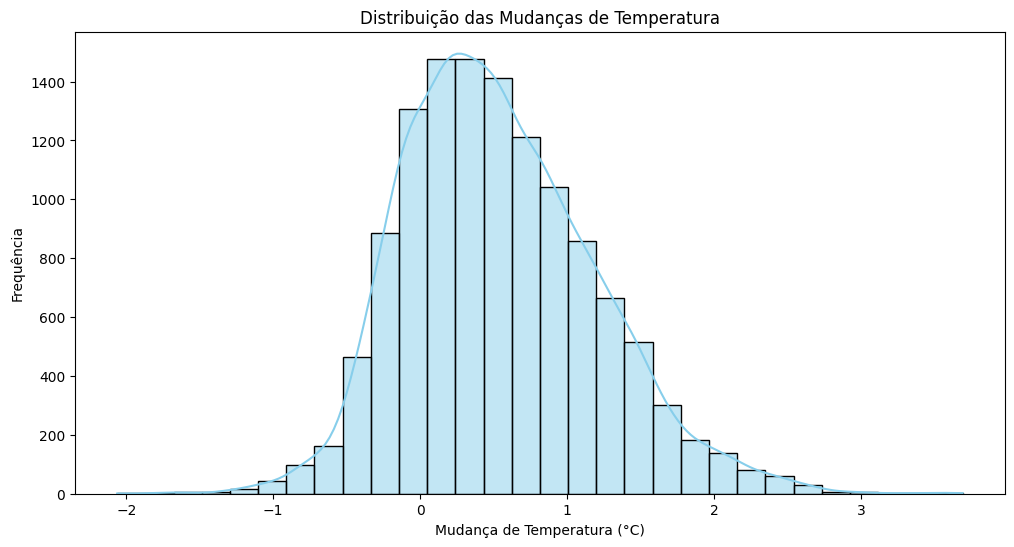

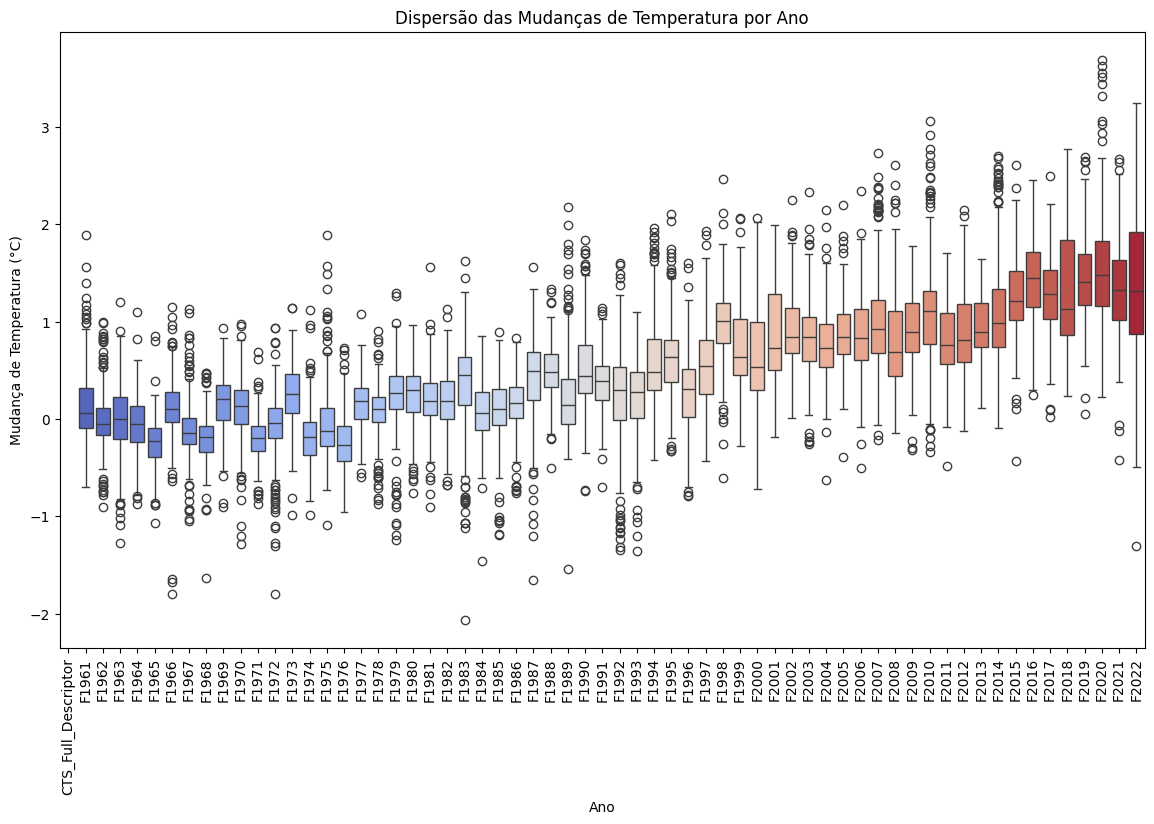

In [ ]:
plt.figure(figsize=(12, 6))
# Histograma para verificar a distribuição de mudanças de temperatura
df_values = df.melt(id_vars=["Country"], value_vars=[col for col in df.columns if "F" in col])
df_values["value"] = pd.to_numeric(df_values["value"], errors="coerce")
sns.histplot(df_values["value"], bins=30, kde=True, color="skyblue")
plt.title("Distribuição das Mudanças de Temperatura")
plt.xlabel("Mudança de Temperatura (°C)")
plt.ylabel("Frequência")
plt.show()

# Boxplot para identificar outliers e dispersão por país
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_values, x="variable", y="value", palette="coolwarm", showfliers=True)
plt.title("Dispersão das Mudanças de Temperatura por Ano")
plt.xlabel("Ano")
plt.ylabel("Mudança de Temperatura (°C)")
plt.xticks(rotation=90)
plt.show()

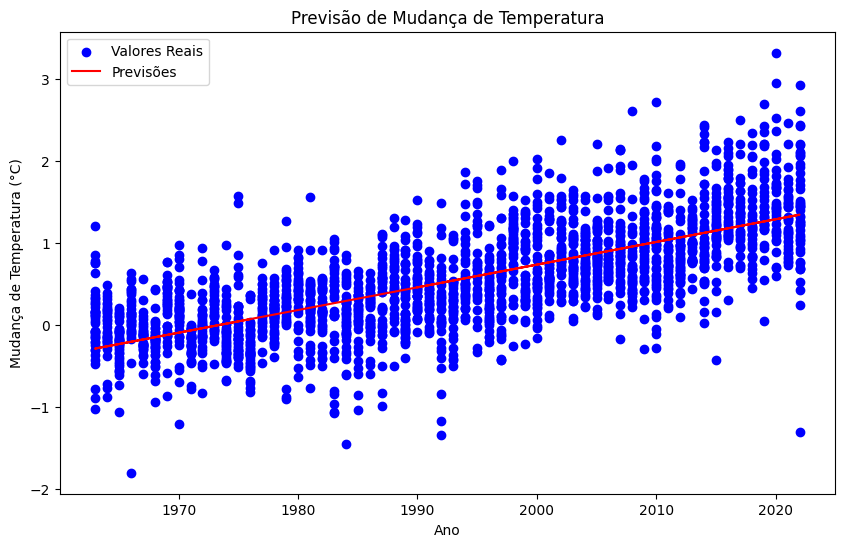

In [ ]:
# Plotar as previsões versus os valores reais
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Valores Reais')
plt.plot(X_test, y_pred, color='red', label='Previsões')
plt.title('Previsão de Mudança de Temperatura')
plt.xlabel('Ano')
plt.ylabel('Mudança de Temperatura (°C)')
plt.legend()
plt.show()


# **Configuração do modelo de previsão linear**

In [ ]:
# Variáveis independentes e dependentes
X = df_melt[['Year']]  # Ano como variável independente
y = df_melt['Tempurate_Change']  # Mudança de temperatura como variável dependente

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)


print("R² Score:", r2)

# Prever mudança de temperatura para 2025
future_year = pd.DataFrame([[2050]], columns=['Year'])
future_prediction = model.predict(future_year)

print(f"Previsão para o ano de 2050: {future_prediction[0]:.2f} °C")


R² Score: 0.5149524377881398
Previsão para o ano de 2050: 2.12 °C
